In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Provisional death counts of diabetes, coronavirus disease 2019 (COVID-19) and other select causes of death, by month, sex, and age.

In [2]:
df = pd.read_csv('AH_Provisional_Diabetes_Death_Counts_for_2020.csv')
df

,Data as of,Date_Of_Death_Year,Date_Of_Death_Month,AgeGroup,Sex,COVID19,Diabetes.uc,Diabetes.mc,C19PlusDiabetes,C19PlusHypertensiveDiseases,C19PlusMajorCardiovascularDiseases,C19PlusHypertensiveDiseasesAndMCVD,C19PlusChronicLowerRespiratoryDisease,C19PlusKidneyDisease,C19PlusChronicLiverDiseaseAndCirrhosis,C19PlusObesity
0,10/20/2020,2020,1,<18 years,Female (F),0,3,5,0,0,0,0,0,0,0,0
1,10/20/2020,2020,1,<18 years,Male (M),0,3,3,0,0,0,0,0,0,0,0
2,10/20/2020,2020,1,18-29 years,Female (F),0,20,36,0,0,0,0,0,0,0,0
3,10/20/2020,2020,1,18-29 years,Male (M),0,44,65,0,0,0,0,0,0,0,0
4,10/20/2020,2020,1,30-39 years,Female (F),0,53,104,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,10/20/2020,2020,9,75-84 years,Male (M),2525,956,3925,385,434,1182,1182,276,292,7,52
222,10/20/2020,2020,9,80+ years,Female (F),3847,1201,4809,426,785,1785,1785,318,255,7,31
223,10/20/2020,2020,9,80+ years,Male (M),3277,1053,4387,394,580,1590,1590,340,331,6,16
224,10/20/2020,2020,9,85+ years,Female (F),2778,806,3204,270,578,1295,1295,209,179,3,16


In [3]:
df.describe()

,Date_Of_Death_Year,Date_Of_Death_Month,COVID19,Diabetes.uc,Diabetes.mc,C19PlusDiabetes,C19PlusHypertensiveDiseases,C19PlusMajorCardiovascularDiseases,C19PlusHypertensiveDiseasesAndMCVD,C19PlusChronicLowerRespiratoryDisease,C19PlusKidneyDisease,C19PlusChronicLiverDiseaseAndCirrhosis,C19PlusObesity
count,226.0,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,2020.0,4.955752,1710.955752,630.084071,2306.327434,280.800885,373.796460,796.712389,796.712389,146.955752,150.066372,13.920354,58.738938
std,0.0,2.581608,2542.191572,490.021920,1939.939655,367.529724,563.602518,1186.756477,1186.756477,211.710972,198.723348,19.359588,73.780865
min,2020.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,3.000000,3.000000,78.250000,163.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.250000
50%,2020.0,5.000000,503.000000,699.500000,2437.500000,90.500000,93.000000,190.500000,190.500000,28.000000,44.500000,6.000000,27.500000
75%,2020.0,7.000000,2624.000000,1071.000000,3880.000000,478.000000,568.750000,1212.750000,1212.750000,221.000000,263.250000,22.500000,92.750000
max,2020.0,9.000000,15882.000000,1569.000000,7200.000000,1521.000000,3274.000000,7001.000000,7001.000000,1094.000000,957.000000,89.000000,380.000000


# data cleaning

In [4]:
df['AgeGroup'].unique()

array(['<18 years', '18-29 years', '30-39 years', '40-49 years',
       '50-59 years', '50-64 years', '60-69 years', '65-74 years',
       '70-79 years', '75-84 years', '80+ years', '85+ years',
       'Unknown age', nan], dtype=object)

In [5]:
#deleting unnown age group
df = df.drop(df[df["AgeGroup"]=='Unknown age'].index)

# missing value

In [6]:
df.isna().sum()

Data as of                                0
Date_Of_Death_Year                        0
Date_Of_Death_Month                       0
AgeGroup                                  1
Sex                                       0
COVID19                                   0
Diabetes.uc                               0
Diabetes.mc                               0
C19PlusDiabetes                           0
C19PlusHypertensiveDiseases               0
C19PlusMajorCardiovascularDiseases        0
C19PlusHypertensiveDiseasesAndMCVD        0
C19PlusChronicLowerRespiratoryDisease     0
C19PlusKidneyDisease                      0
C19PlusChronicLiverDiseaseAndCirrhosis    0
C19PlusObesity                            0
dtype: int64

In [7]:
#Filling In Missing Data
df= df.fillna(method='ffill')

In [8]:
df.isna().sum()

Data as of                                0
Date_Of_Death_Year                        0
Date_Of_Death_Month                       0
AgeGroup                                  0
Sex                                       0
COVID19                                   0
Diabetes.uc                               0
Diabetes.mc                               0
C19PlusDiabetes                           0
C19PlusHypertensiveDiseases               0
C19PlusMajorCardiovascularDiseases        0
C19PlusHypertensiveDiseasesAndMCVD        0
C19PlusChronicLowerRespiratoryDisease     0
C19PlusKidneyDisease                      0
C19PlusChronicLiverDiseaseAndCirrhosis    0
C19PlusObesity                            0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# there is no duplicated data . great!!!

# outliers

In [320]:
def detect_outliers(df,features):
    df_copy = df.drop(df[(df[features] == 0)].index)
    # 1st quartile
    q1 = df_copy[features].quantile(0.25)
    # 3rd quartile
    q3 = df_copy[features].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    outlier_list_col = df_copy[(df_copy[features] >= Upper_tail) | (df_copy[features] <= Lower_tail)]  # | means "or"
    return pd.DataFrame(outlier_list_col)
    

In [321]:
def upper_lower(df,features):
    df_copy = df.drop(df[(df[features] == 0)].index)
    # 1st quartile
    q1 = df_copy[features].quantile(0.25)
    # 3rd quartile
    q3 = df_copy[features].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    outlier_list_col = df_copy[(df_copy[features] >= Upper_tail) | (df_copy[features] <= Lower_tail)]  # | means "or"
    return Upper_tail,Lower_tail

In [322]:
detect_outliers(df,'Diabetes.uc')

,Data as of,Date_Of_Death_Year,Date_Of_Death_Month,AgeGroup,Sex,COVID19,Diabetes.uc,Diabetes.mc,C19PlusDiabetes,C19PlusHypertensiveDiseases,C19PlusMajorCardiovascularDiseases,C19PlusHypertensiveDiseasesAndMCVD,C19PlusChronicLowerRespiratoryDisease,C19PlusKidneyDisease,C19PlusChronicLiverDiseaseAndCirrhosis,C19PlusObesity


In [323]:
detect_outliers(df,'Diabetes.mc')

,Data as of,Date_Of_Death_Year,Date_Of_Death_Month,AgeGroup,Sex,COVID19,Diabetes.uc,Diabetes.mc,C19PlusDiabetes,C19PlusHypertensiveDiseases,C19PlusMajorCardiovascularDiseases,C19PlusHypertensiveDiseasesAndMCVD,C19PlusChronicLowerRespiratoryDisease,C19PlusKidneyDisease,C19PlusChronicLiverDiseaseAndCirrhosis,C19PlusObesity


# explotary data analysis

<AxesSubplot:ylabel='AgeGroup'>

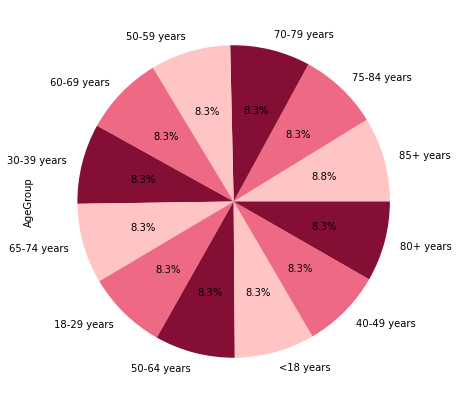

In [11]:
# pie bar for sex
round(df['AgeGroup'].value_counts()/ df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%',
 figsize =(7, 10),colors=['#FFC4C4','#EE6983','#850E35'])

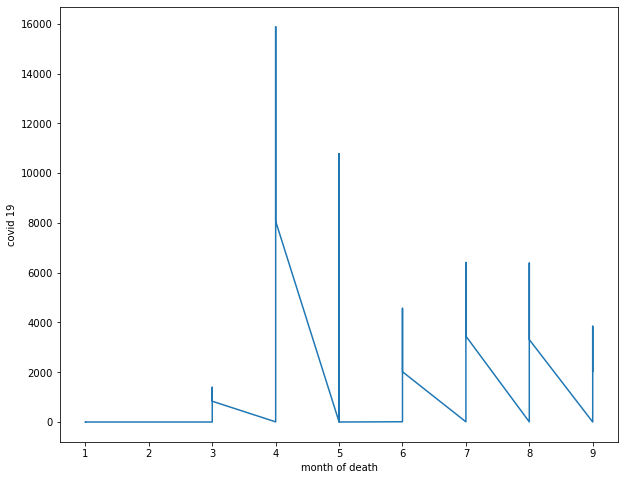

In [30]:
plt.figure(figsize=(10, 8))

plt.plot(df['Date_Of_Death_Month'], 
         df['COVID19'])


plt.xlabel('month of death')
plt.ylabel('covid 19')

plt.show()

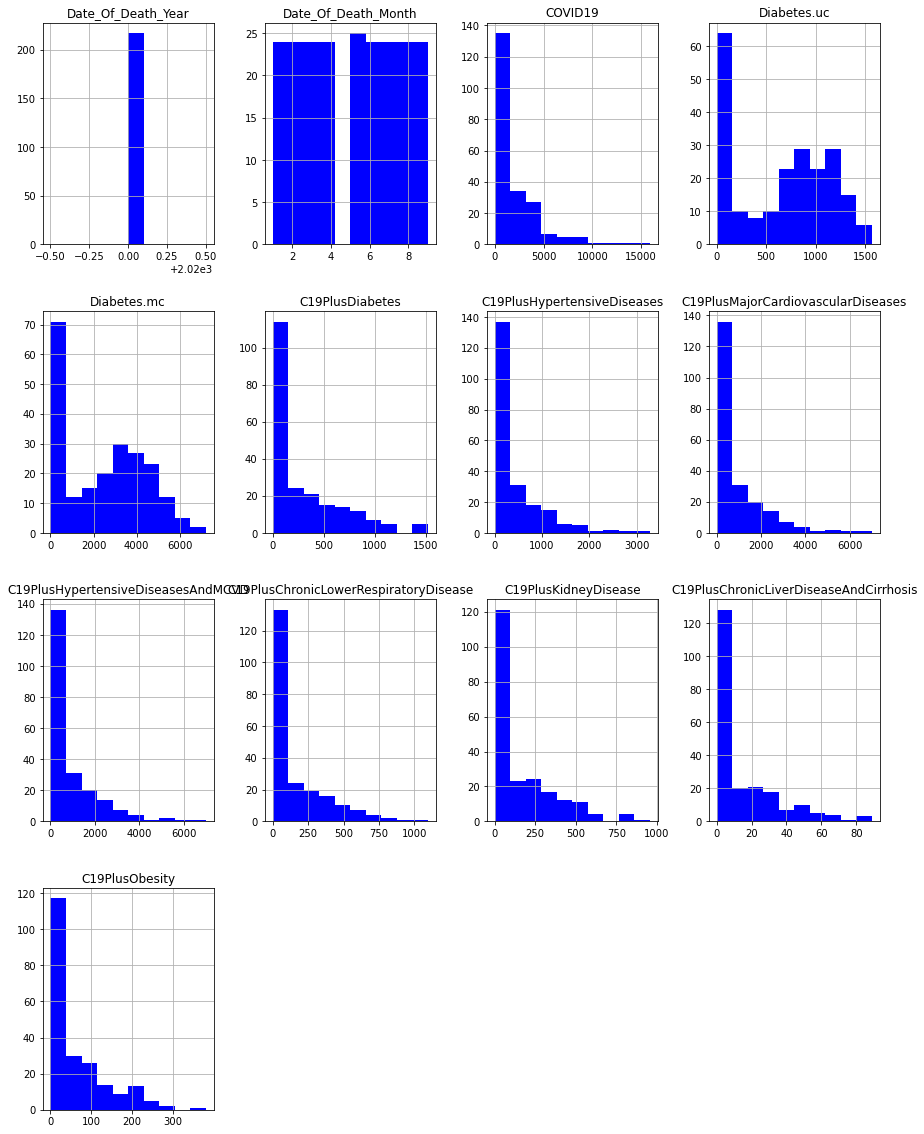

In [12]:
# plot histograms for each numerical variable
df.hist(figsize = (15, 20),color='b')
plt.show()

In [13]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
 
    
    
    plt.show()

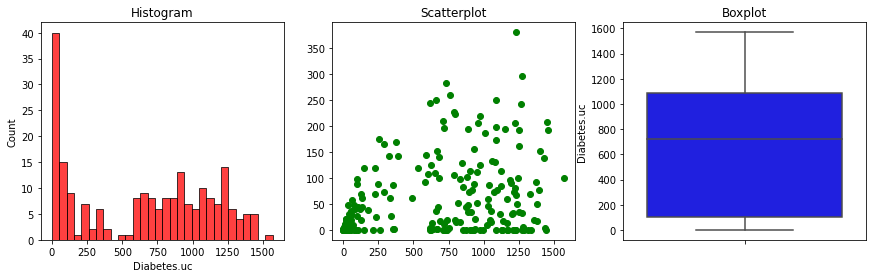

In [14]:
diagnostic_plots(df,'Diabetes.uc','C19PlusObesity' )

<AxesSubplot:xlabel='C19PlusDiabetes', ylabel='AgeGroup'>

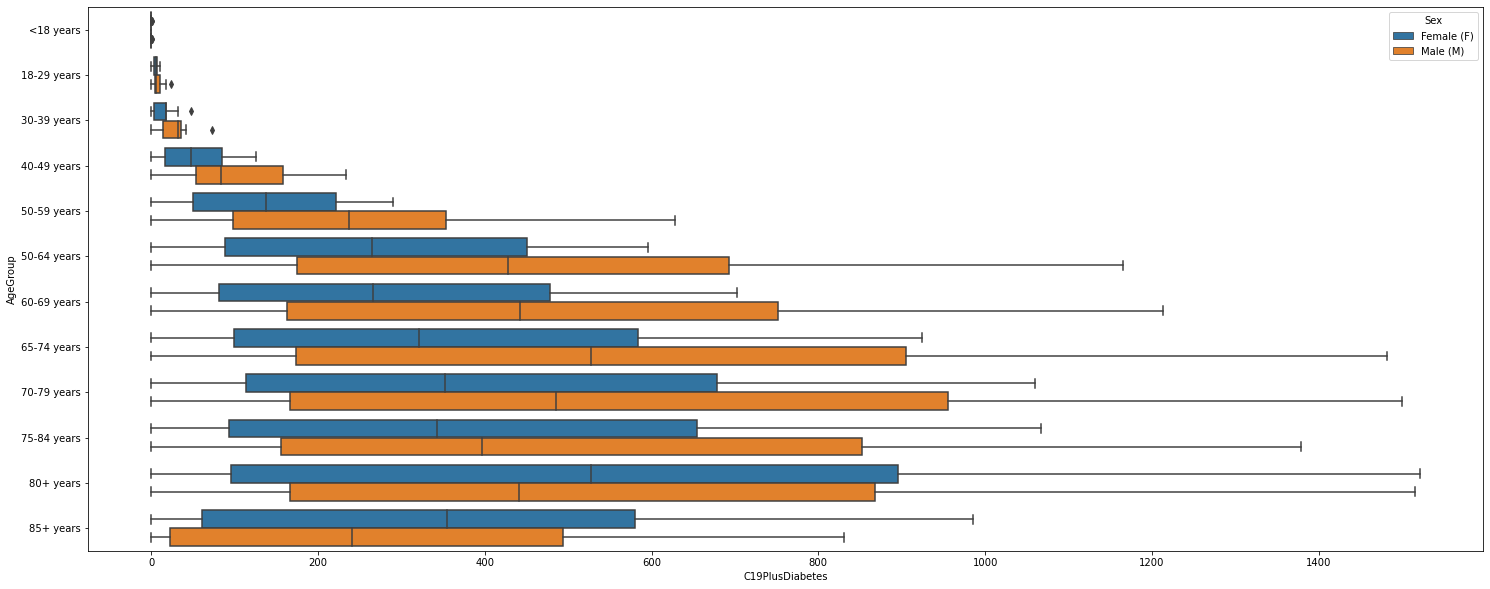

In [15]:
fig, ax = plt.subplots(figsize=(25,10))

sns.boxplot(x='C19PlusDiabetes', y='AgeGroup', hue='Sex', data=df, ax=ax)

In [16]:
# predictin of covid 19 from 'Diabetes.mc','Diabetes.uc'

In [17]:
#regression multiple
df_features = ['Diabetes.mc','Diabetes.uc']
x=df[df_features]
x

,Diabetes.mc,Diabetes.uc
0,5,3
1,3,3
2,36,20
3,65,44
4,104,53
...,...,...
221,3925,956
222,4809,1201
223,4387,1053
224,3204,806


In [18]:
y = df['COVID19']
y

0         0
1         0
2         0
3         0
4         0
       ... 
221    2525
222    3847
223    3277
224    2778
225    2036
Name: COVID19, Length: 217, dtype: int64

In [19]:
#MULTIPLE linear regression model
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()
#fit regression model
model.fit(x, y)
print(model.intercept_, model.coef_, model.score(x, y))


352.2524322804186 [  3.94008461 -12.24347368] 0.7262320389175432


In [20]:
import statsmodels.api as sm
#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())
#create Q-Q plot

                            OLS Regression Results                            
Dep. Variable:                COVID19   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     283.8
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           6.31e-61
Time:                        11:59:14   Log-Likelihood:                -1870.7
No. Observations:                 217   AIC:                             3747.
Df Residuals:                     214   BIC:                             3757.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         352.2524    158.666      2.220      

In [21]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import preprocessing, svm
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.2)
train_X.shape, test_X.shape, train_y.shape


((173, 3), (44, 3), (173,))

In [22]:
# LINEAR REGRESSION ALGORITHM
mdl3=LinearRegression(normalize=True, fit_intercept=False).fit(train_X,train_y)
print("Training_score : " , mdl3.score(train_X,train_y))
#print(accuracy)
predictors = train_X.columns
predictors


Training_score :  0.7439373142457532


Index(['const', 'Diabetes.mc', 'Diabetes.uc'], dtype='object')

In [23]:
coef = pd.Series(mdl3.coef_, predictors).sort_values()

print(coef)

Diabetes.uc    -11.859301
Diabetes.mc      3.805160
const          376.132762
dtype: float64


In [24]:
y_pred = mdl3.predict(test_X)
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': test_y})
df_pred_actual.head(5)

,predicted,actual
149,4952.282434,3163
76,339.667215,9
28,256.019045,0
71,4222.169518,1234
168,3172.785679,3114


In [25]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(test_y, y_pred))

Testing_score :  0.6820000956000738


In [26]:
df_sample100= df_pred_actual.sample(35).reset_index()
df_sample100

,index,predicted,actual
0,146,2987.650772,2130
1,83,163.266963,1284
2,39,-893.584843,1
3,71,4222.169518,1234
4,117,3488.386455,4404
5,104,291.596948,37
6,113,943.041087,3380
7,197,5935.692097,6384
8,98,6474.398032,11870
9,87,2551.305662,6318


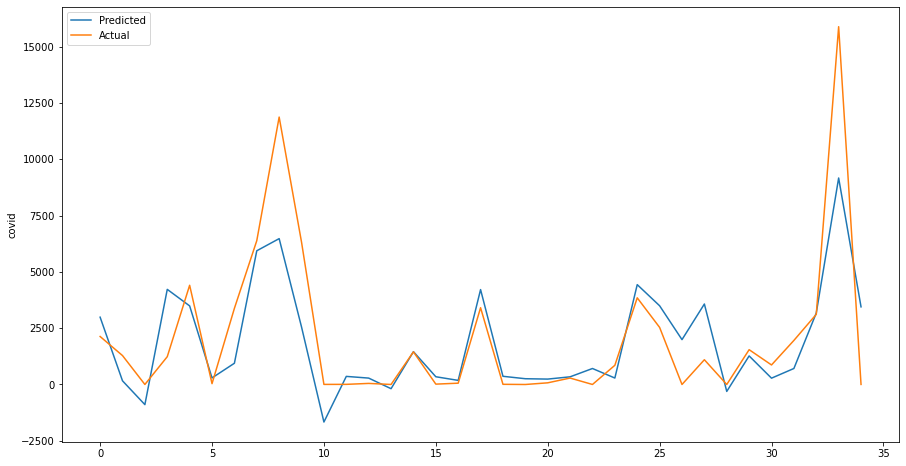

In [27]:
plt.figure(figsize = (15,8))

plt.plot(df_sample100['predicted'], label='Predicted')
plt.plot(df_sample100['actual'], label='Actual')

plt.ylabel('covid')

plt.legend()
plt.show()